# Case 1: Titanic
Door: Alaric, Matthijs, Sara, Hanna

![Alt text](imgs/MicrosoftTeams-image.png)

In [445]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# **De vorm van de gegevens begrijpen met behulp van visualisatie**

In [446]:
traindf = pd.read_csv('data/train.csv')

In [447]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Heatmap

Met behulp van de heatmap kunnen we sterke correlaties weergeven en identificeren.

In het diagram hieronder betekent een donkere kleur en een hoger nummer een sterkere correlatie tussen de twee variabelen.

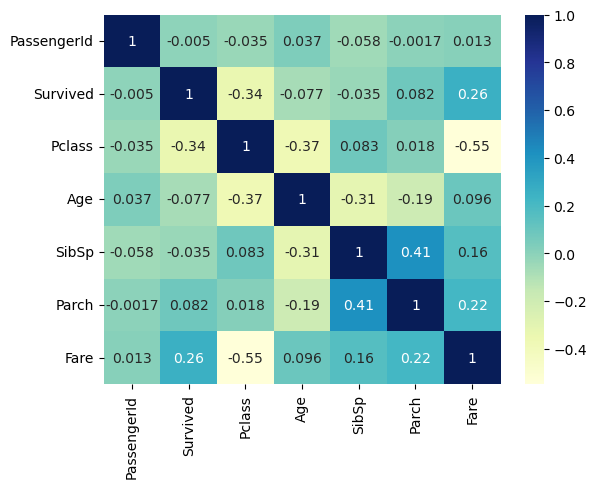

In [448]:
sns.heatmap(traindf.corr(), cmap='YlGnBu',annot=True)
plt.show()

# Overlevingskans per reisklasse

Die code hieronder plot voor iedere reisklasse het overlevings percentage van de passagiers in die klasse.

{'1': 0.6296296296296297, '2': 0.47282608695652173, '3': 0.24236252545824846}


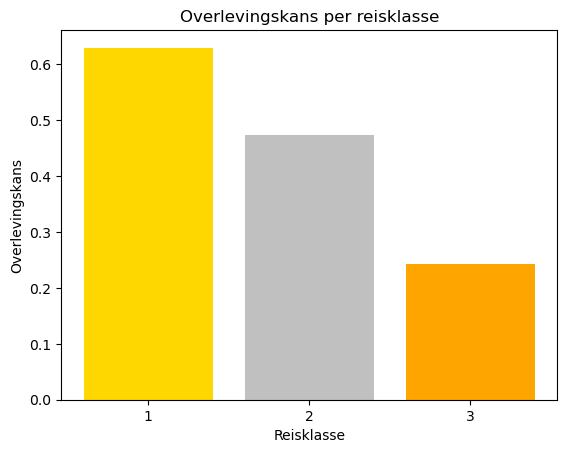

In [449]:
# dit telt hoeveel passagiers per klasse er zijn
passengers_by_class = traindf.groupby('Pclass').count()

# dit telt hoeveel passagiers overleden en overleefd hebben per reisklasse
passengers_survived_by_class = traindf.groupby(['Pclass','Survived']).count()
classes = [1,2,3]
survival_chance_by_class = {}

# deze for loop berekent per reisklasse de overlevingskans
for pclass in classes:
    survival_chance_by_class[str(pclass)] = (passengers_survived_by_class['PassengerId'][pclass] / passengers_by_class['PassengerId'][pclass])[1]
print(survival_chance_by_class)

fig,ax = plt.subplots()
ax.bar(x=list(survival_chance_by_class.keys()),height=survival_chance_by_class.values(),color=['gold','silver','orange'])
ax.set_xlabel('Reisklasse')
ax.set_ylabel('Overlevingskans')
ax.set_title("Overlevingskans per reisklasse")
plt.show()


# Overlevingskans op basis van Familie leden aan boord

In [450]:
sibling_totals = traindf['SibSp'].value_counts()

In [451]:
survived_siblings = traindf.loc[traindf['Survived']==1]['SibSp'].value_counts()

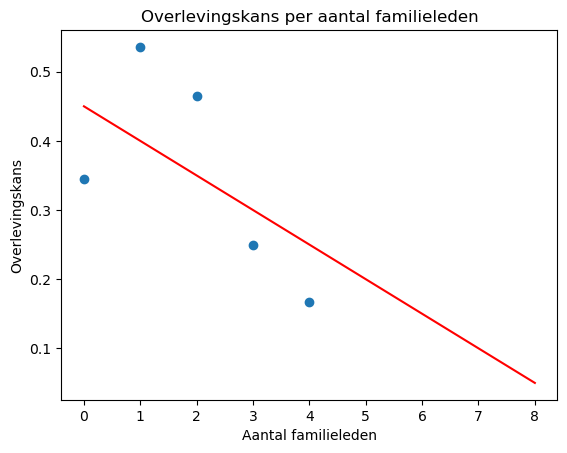

In [452]:

sibling_data = {
    'siblings_totals' : sibling_totals,
    'siblings_survived' : survived_siblings
}

# hier wordt een dataframe aangemaakt waarin overlevings kansen per hoeveelheid siblings wordt berekend
df = pd.DataFrame(sibling_data)
df['siblings_survival_rate'] = df['siblings_survived'] / df['siblings_totals']


# dit is een linear regressie model dat een voorspelling op basis van de beschikbare gegevens
class SiblingLinearRegression:
    def __init__(self):
        self.a = -0.05
        self.b = 0.45

    def f(self,x):
        return (self.a * x) + self.b

sblin = SiblingLinearRegression()

line = []
for value in df.index:
    line.append(sblin.f(value))

fig,ax = plt.subplots()

# df.index bevat hier het aantal familie leden
ax.scatter(x=df.index,y=df['siblings_survival_rate'])
ax.plot(df.index,line,c='r')
ax.set_xlabel("Aantal familieleden")
ax.set_ylabel("Overlevingskans")
ax.set_title("Overlevingskans per aantal familieleden")
plt.show()


# Overlevingskans op basis van geslacht

In [453]:
SurvivedbySex = pd.crosstab(index = traindf["Survived"], columns = traindf["Sex"])
SurvivedbySex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [454]:
women = traindf.loc[traindf.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [455]:
men = traindf.loc[traindf.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [456]:
# Dictionary gender
genderdictionary = {"male" : rate_men, 
                    "female" : rate_women}

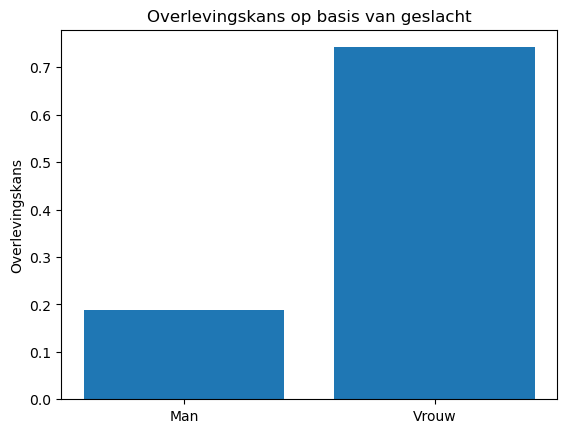

In [457]:
fig,ax = plt.subplots()

ax.bar(['Man','Vrouw'],genderdictionary.values())
ax.set_title("Overlevingskans op basis van geslacht")
ax.set_ylabel("Overlevingskans")
plt.show()


# Overlevingskans op basis van het aantal ouders / kinderen

In [458]:
# Crosstab van aantal overlevenden & aantal ouders/kinderen
SurvivedbyParch = pd.crosstab(index = traindf["Survived"], columns = traindf["Parch"])
SurvivedbyParch


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


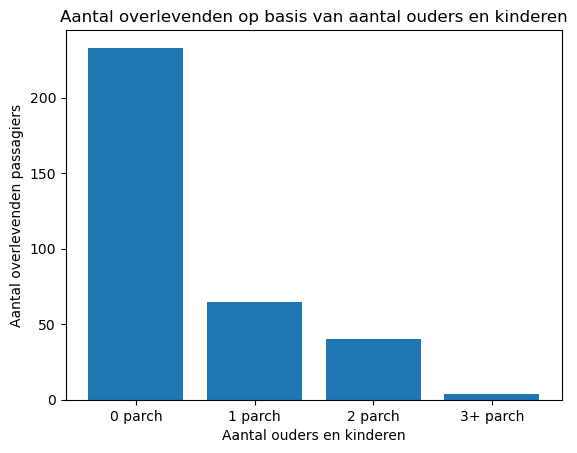

In [459]:
#Bar chart van aantal overleden 
overlevenden_parch = {
    '0 parch': (traindf[traindf['Survived'] == 1]['Parch'] == 0).sum(),
    '1 parch': (traindf[traindf['Survived'] == 1]['Parch'] == 1).sum(),
    '2 parch': (traindf[traindf['Survived'] == 1]['Parch'] == 2).sum(),
    '3+ parch': (traindf[traindf['Survived'] == 1]['Parch'] >= 3).sum()
}

plt.bar(overlevenden_parch.keys(), overlevenden_parch.values())
plt.xlabel("Aantal ouders en kinderen")
plt.ylabel("Aantal overlevenden passagiers")
plt.title("Aantal overlevenden op basis van aantal ouders en kinderen")

plt.show()


In [460]:
parch_totals = traindf['Parch'].value_counts()
survived_parch = traindf.loc[traindf['Survived']==1]['Parch'].value_counts()

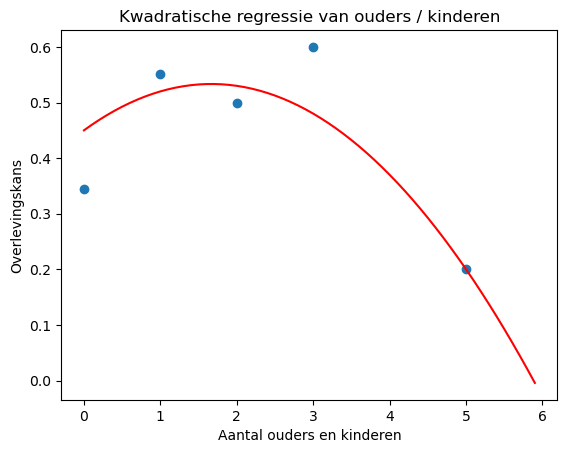

In [461]:
parch_dictionary = {}
parch_dictionary

parch_data = {
    'parch_totals' : parch_totals,
    'parch_survived' : survived_parch
}

df = pd.DataFrame(parch_data)
df['parch_survival_rate'] = df['parch_survived'] / df['parch_totals']

parch_dictionary['totals'] = {}
parch_dictionary['survived'] = {}

class ParchLinearRegression:
    def __init__(self):
        self.a = -0.03
        self.b = 0.1
        self.c = 0.45

    def f(self,x):
        return (self.a * (x ** 2)) + (self.b * x) + self.c

parchlin = ParchLinearRegression()

x = [i/10 for i in range(60)]
y = [parchlin.f(v) for v in x]
line = []
for value in df.index:
    line.append(parchlin.f(value))

fig,ax = plt.subplots()
ax.scatter(x=df.index,y=df['parch_survival_rate'])
ax.plot(x,y,c='r')
ax.set_title("Kwadratische regressie van ouders / kinderen")
ax.set_xlabel("Aantal ouders en kinderen")
ax.set_ylabel("Overlevingskans")
plt.show()

# Boxplot leeftijd

De volgende boxplot is gemaakt om de relatie tussen overlevingskans en leeftijd weer te geven.

De resultaten hiervan zijn niet gebruikt in het voorspellingsmodel, omdat er veel leeftijden uit de dataset misten.

In [462]:
traindf2 = traindf.copy()

traindf3 = traindf2.dropna()
#Boxplot data 
overleden_age = {'Overleefd': traindf3[traindf3['Survived'] == 1]['Age'],
                        'Overleden': traindf3[traindf3['Survived'] == 0]['Age']}



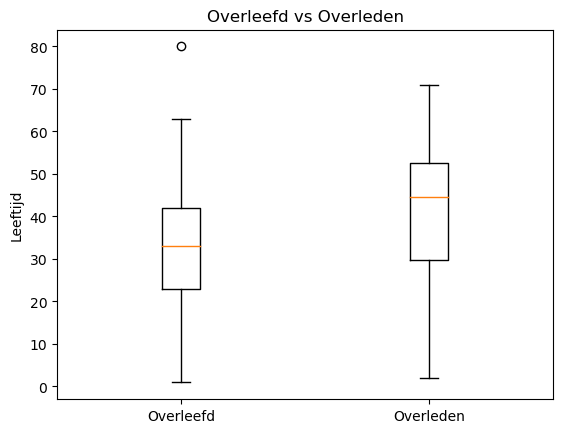

In [463]:
#code voor boxplot
fig, ax = plt.subplots()



ax.boxplot(overleden_age.values())

# ax.set_title('Title')
ax.set_title("Overleefd vs Overleden")
# ax.set_xticklabels(['Overleefd', Overleden])
ax.set_xticklabels(overleden_age.keys())
# ax.set_ylabel('Y')
ax.set_ylabel('Leeftijd')

plt.show()


# Voorspellingsmodel

Het voorspellingsmodel maakt gebruik van de eerder berekende statistieken en relaties om een voorspelling te maken.

![Alt text](imgs/PredictionModel.png)

![](imgs/perceptron_formula_wb.png)

In [464]:

# de volgende functies kunnen op bases van gegeven datapunten voorspelling maken 
def predict_based_on_pclass(pclass):
    return survival_chance_by_class[str(pclass)]

def predict_based_on_sex(sex):
    return genderdictionary[sex]

def predict_based_on_siblings(siblings):
    return sblin.f(siblings)

def predict_based_on_parch(parch):
    return parchlin.f(parch)

# deze functie genereert overlevings kansen aan de hand van een dataset
def dataset_to_probabilities(dataset):
    predict_funcs = {
        "Pclass":predict_based_on_pclass,
        "Sex":predict_based_on_sex,
        "SibSp":predict_based_on_siblings,
        "Parch":predict_based_on_parch,
    }
    probabilities = []
    for row in dataset.iloc:
        probability_vector = []
        for key in row.keys():
            if key in predict_funcs.keys():
                probability_vector.append(predict_funcs[key](row[key]))
        probabilities.append(probability_vector)
    
    np_probabilities = np.array(probabilities)
    return np_probabilities


In [465]:

# deze functie voert het model uit met de gegeven kansen en gewichten
def prediction_model(probabilities,weights):
    predictions = probabilities.dot(weights.transpose())
    return np.where(predictions >= 0.5,1,0).transpose()

# deze functie bepaal hoe accuraat het model is op basis van train dataset
def calc_model_accuracy(weights):
    probabilities = dataset_to_probabilities(traindf)
    predictions = prediction_model(probabilities,weights)

    correct_vector = traindf['Survived'].to_numpy()
    total = len(correct_vector)
    scores = []
    for prediction in predictions:
        result = (correct_vector == prediction).sum()
        scores.append(result/total)
    return scores

best_weights = np.ndarray([])

# deze functie zoekt beste gewichten op voor het voorspellingsmodel
def optimize():
    global best_weights

    params_scores = {
        'Pclass':[],
        'Sex':[],
        'SibSp':[],
        'Parch':[],
        'scores':[],
    }
    weight_types = list(params_scores.keys())

    w_range = 10
    precision = 1.0/w_range

    weights = []

    # deze for loop genereert verschillende combinaties van gewichten die getest gaan worden
    for i in range(w_range):
        for j in range(w_range):
            for k in range(w_range):
                for l in range(w_range):
                    weight_vector = [
                        i * precision,
                        j * precision, 
                        k * precision,
                        l * precision,
                    ]
                    for i in range(len(weight_vector)):
                        params_scores[weight_types[i]].append(weight_vector[i])
                    weights.append(weight_vector)


    weight_matrix = np.array(weights)
    params_scores['scores'] = calc_model_accuracy(weight_matrix)

    
    # dit exporteert de gewichten en de bijbehorende score als een csv
    params_scores_df = pd.DataFrame(params_scores)
    params_scores_df.to_csv('param_scores.csv')
    params_scores_df = params_scores_df.sort_values(by='scores',ascending=False)
    best_weights = params_scores_df.iloc[0].values[0:-1]
    print("best weights:",best_weights)
    

def gen_submission():
    global best_weights
    weights=best_weights
    testset = pd.read_csv('data/test.csv')
    test_probs = dataset_to_probabilities(testset)
    testset['Survived'] = prediction_model(test_probs,weights)
    submission = testset[['PassengerId', 'Survived']].set_index('PassengerId')
    submission.to_csv('submission.csv')

optimize()
gen_submission()

best weights: [0.3 0.4 0.2 0.1]


   Pclass  Sex  SibSp  Parch    scores
0     0.0  0.0    0.0    0.0  0.616162
1     0.3  0.0    0.0    0.1  0.616162
2     0.3  0.0    0.0    0.2  0.616162
3     0.3  0.0    0.0    0.3  0.616162
4     0.3  0.0    0.0    0.4  0.616162


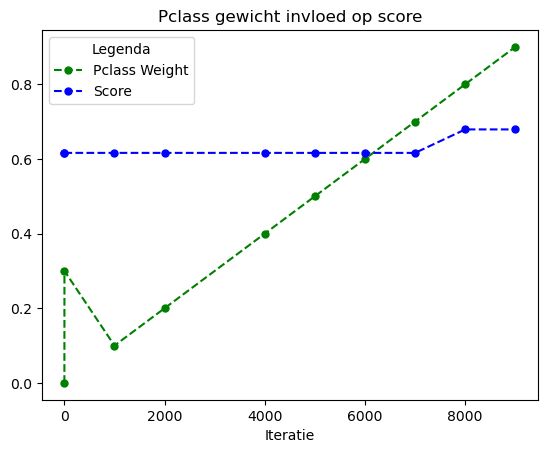

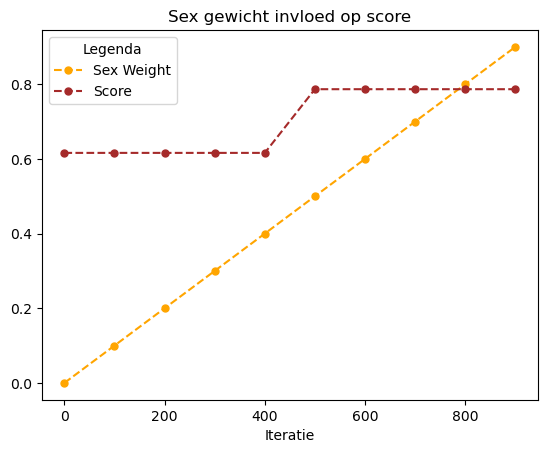

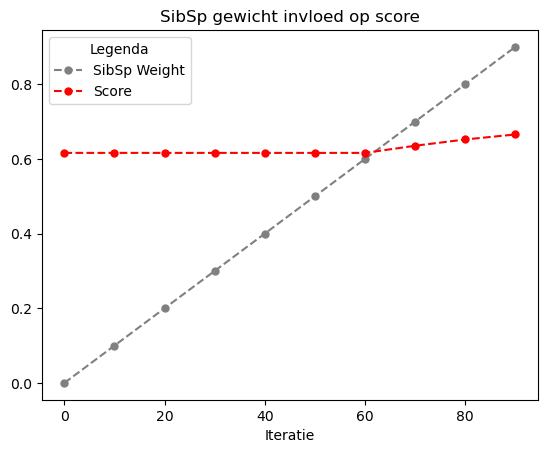

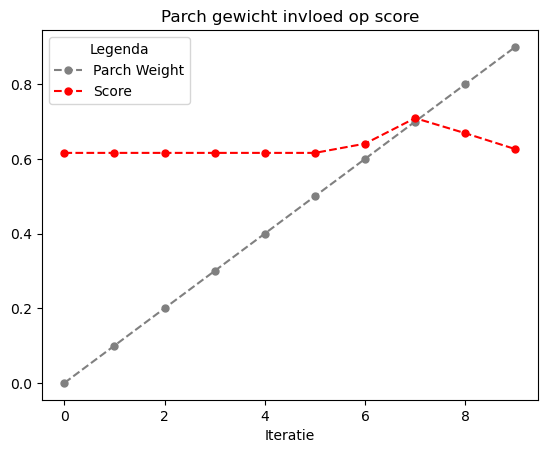

In [466]:
param_scores = pd.read_csv('param_scores.csv',index_col=0)
print(param_scores.head())

#pclass_weight visualization
pclass_data = param_scores.copy()
pclass_data = pclass_data.drop_duplicates('Pclass')
fig,ax = plt.subplots()
ax.plot(pclass_data['Pclass'], color='green', linestyle='dashed', marker='o',
     markerfacecolor='green', markersize=5)
ax.plot(pclass_data['scores'], color='blue', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=5)
ax.set_title("Pclass gewicht invloed op score")
ax.set_xlabel("Iteratie")
plt.legend(["Pclass Weight", "Score"], loc='best', title='Legenda')
plt.show()

#sex_weight visualization
sex_data = param_scores.copy()
sex_data = sex_data.drop_duplicates('Sex')
fig,ax = plt.subplots()
ax.plot(sex_data['Sex'], color='orange', linestyle='dashed', marker='o',
     markerfacecolor='orange', markersize=5)
ax.plot(sex_data['scores'], color='brown', linestyle='dashed', marker='o',
     markerfacecolor='brown', markersize=5)
ax.set_title("Sex gewicht invloed op score")
ax.set_xlabel("Iteratie")
plt.legend(["Sex Weight", "Score"], loc='best', title='Legenda')
plt.show()

#sibling_weight visualization
sibling_data = param_scores.copy()
sibling_data = sibling_data.drop_duplicates('SibSp')
fig,ax = plt.subplots()
ax.plot(sibling_data['SibSp'], color='grey', linestyle='dashed', marker='o',
     markerfacecolor='grey', markersize=5)
ax.plot(sibling_data['scores'],  color='red', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=5)
ax.set_title("SibSp gewicht invloed op score")
ax.set_xlabel("Iteratie")
plt.legend(["SibSp Weight", "Score"], loc='best', title='Legenda')
plt.show()

#parch_weight visualization EDIT
sibling_data = param_scores.copy()
sibling_data = sibling_data.drop_duplicates('Parch')
fig,ax = plt.subplots()
ax.plot(sibling_data['Parch'], color='grey', linestyle='dashed', marker='o',
     markerfacecolor='grey', markersize=5)
ax.plot(sibling_data['scores'],  color='red', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=5)
ax.set_title("Parch gewicht invloed op score")
ax.set_xlabel("Iteratie")
plt.legend(["Parch Weight", "Score"], loc='best', title='Legenda')
plt.show()

In [467]:
cabindf = pd.read_csv('data/train.csv')

In [468]:
cabindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [469]:
# Double Cabin verwijderen met een nieuwe dataframe 
cabindf.Cabin.count()
Totale_Survived = cabindf.Survived.sum()
print(Totale_Survived)



342


In [470]:
cabindf.groupby(['Cabin']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,0,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,0,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
F33,3,3,3,3,3,3,3,3,3,3,3
F38,1,1,1,1,1,0,1,1,1,1,1
F4,2,2,2,2,2,2,2,2,2,2,2


In [471]:
cabindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [472]:
cabindf['Cabin'] = cabindf['Cabin'].fillna('na')

In [473]:
cabindf['Cabin'] = cabindf['Cabin'].str.replace('\d+', '')



/tmp/ipykernel_14425/7347007.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cabindf['Cabin'] = cabindf['Cabin'].str.replace('\d+', '')


In [474]:
def remove_duplicate_chars(string):
    if type(string) != str:
        return ''    
    return ''.join(set(string.replace(' ','')))




In [475]:

cabindf['Cabin'] = cabindf['Cabin'].apply(remove_duplicate_chars)

In [476]:
cabindf.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,an,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,an,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,an,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,an,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,an,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,an,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,an,C


In [477]:
Totaal_cabin = cabindf['Cabin'].value_counts()
print(Totaal_cabin)

an    687
C      59
B      47
D      33
E      32
A      15
F       9
G       4
FG      3
FE      1
T       1
Name: Cabin, dtype: int64


In [478]:
D_Cabin = cabindf.loc[cabindf['Survived']==1]['Cabin'].value_counts()
print(D_Cabin)



an    206
C      35
B      35
D      25
E      24
A       7
F       7
G       2
FE      1
Name: Cabin, dtype: int64


In [479]:
cabin_data = {
    'cabin_totals': Totaal_cabin,
    'cabin_survived': D_Cabin
}
print(cabin_data)
cabin_data_df = pd.DataFrame(cabin_data)
cabin_data_df['cabin_survival_rate'] = cabin_data_df['cabin_survived'] / cabin_data_df['cabin_totals']
print(cabin_data_df.head(15))

{'cabin_totals': an    687
C      59
B      47
D      33
E      32
A      15
F       9
G       4
FG      3
FE      1
T       1
Name: Cabin, dtype: int64, 'cabin_survived': an    206
C      35
B      35
D      25
E      24
A       7
F       7
G       2
FE      1
Name: Cabin, dtype: int64}
    cabin_totals  cabin_survived  cabin_survival_rate
A             15             7.0             0.466667
B             47            35.0             0.744681
C             59            35.0             0.593220
D             33            25.0             0.757576
E             32            24.0             0.750000
F              9             7.0             0.777778
FE             1             1.0             1.000000
FG             3             NaN                  NaN
G              4             2.0             0.500000
T              1             NaN                  NaN
an           687           206.0             0.299854
